In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [2]:
sleep_df = pd.read_csv("../project-1/Resources/Sleep_health_and_lifestyle_dataset.csv")
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


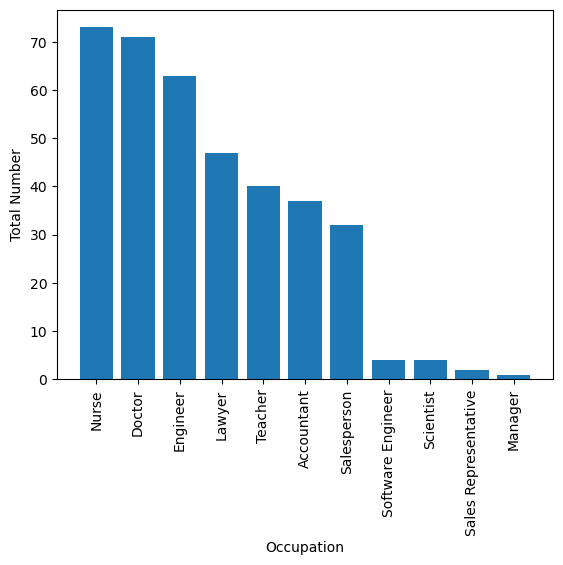

In [3]:
#Looking at sample sizes for Occupation
plt.bar(sleep_df["Occupation"].value_counts().index.values, sleep_df["Occupation"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Total Number")
plt.show()

In [4]:
#Removing Samples that are less than 30
value_counts = sleep_df["Occupation"].value_counts()
remove = value_counts[value_counts < 30].index
sleep_df_clean = sleep_df[~sleep_df["Occupation"].isin(remove)]
sleep_df_clean.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [5]:
#Looking at averate sleep duration and quality based on occupation
occupation_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Occupation"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Occupation"])["Quality of Sleep"].mean(),
})
occupation_df

,Mean Sleep Duration,Mean Sleep Quality
Occupation,,
Accountant,7.113514,7.891892
Doctor,6.970423,6.647887
Engineer,7.987302,8.412698
Lawyer,7.410638,7.893617
Nurse,7.063014,7.369863
Salesperson,6.403125,6.000000
Teacher,6.690000,6.975000


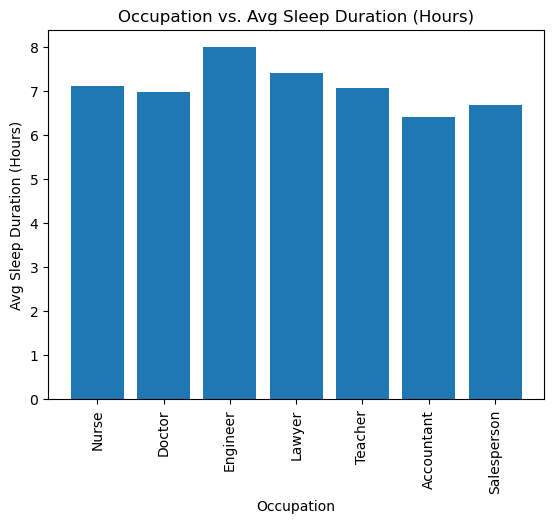

In [6]:
plt.bar(sleep_df_clean["Occupation"].value_counts().index.values ,sleep_df_clean.groupby(["Occupation"])["Sleep Duration"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Occupation vs. Avg Sleep Duration (Hours)")
plt.show()

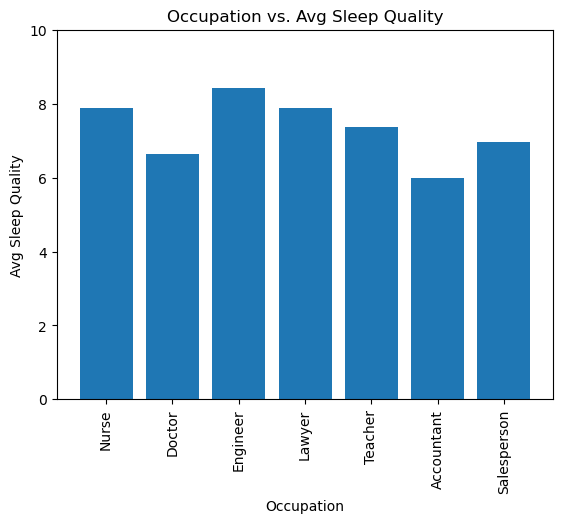

In [7]:
plt.bar(sleep_df_clean["Occupation"].value_counts().index.values ,sleep_df_clean.groupby(["Occupation"])["Quality of Sleep"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Occupation")
plt.ylabel("Avg Sleep Quality")
plt.title("Occupation vs. Avg Sleep Quality")
plt.ylim(0,10)
plt.show()

In [8]:
gender_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Gender"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Gender"])["Quality of Sleep"].mean(),
})
gender_df

,Mean Sleep Duration,Mean Sleep Quality
Gender,,
Female,7.258889,7.727778
Male,7.055191,7.010929


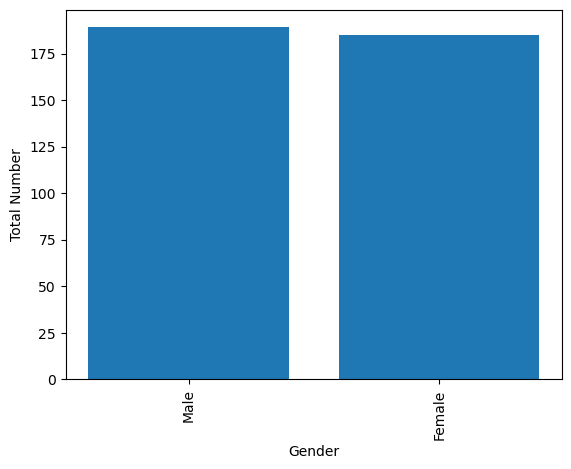

In [9]:
plt.bar(sleep_df["Gender"].value_counts().index.values, sleep_df["Gender"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Gender")
plt.ylabel("Total Number")
plt.show()

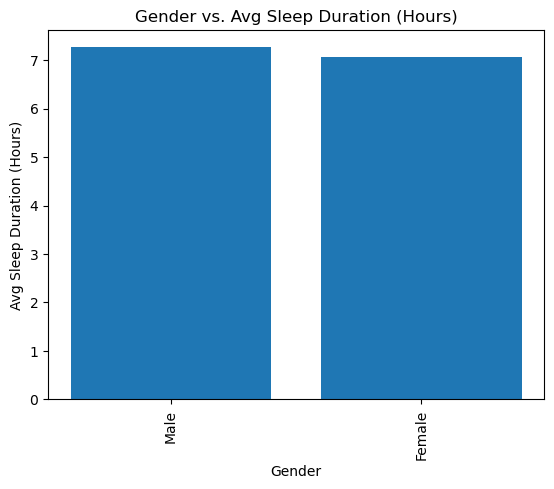

In [10]:
plt.bar(sleep_df_clean["Gender"].value_counts().index.values ,sleep_df_clean.groupby(["Gender"])["Sleep Duration"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Gender")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Gender vs. Avg Sleep Duration (Hours)")
plt.show()

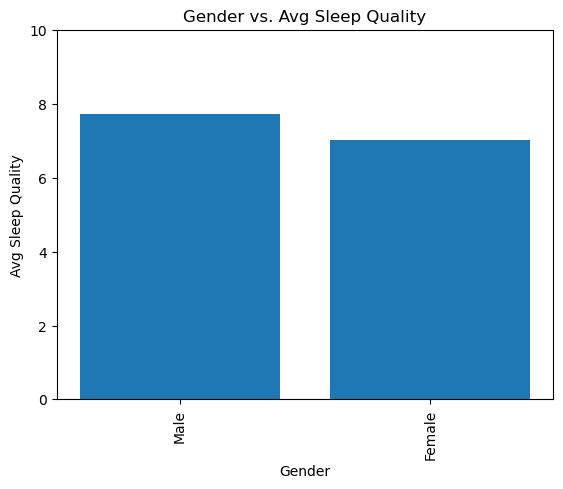

In [11]:
plt.bar(sleep_df_clean["Gender"].value_counts().index.values ,sleep_df_clean.groupby(["Gender"])["Quality of Sleep"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Gender")
plt.ylabel("Avg Sleep Quality")
plt.title("Gender vs. Avg Sleep Quality")
plt.ylim(0,10)
plt.show()

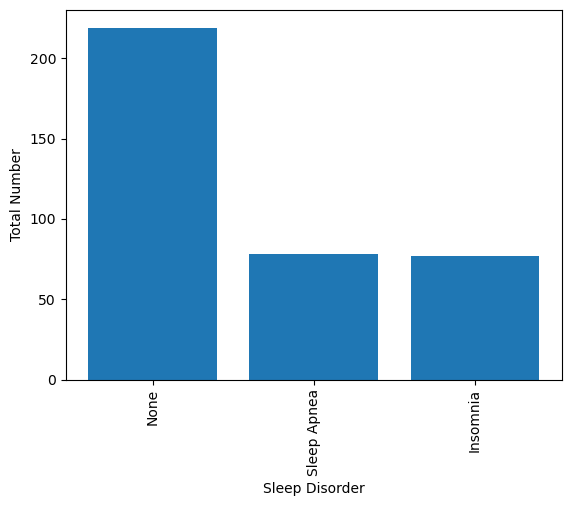

In [12]:
# Looking at heart rate to see sample sizes
plt.bar(sleep_df["Sleep Disorder"].value_counts().index.values, sleep_df["Sleep Disorder"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Sleep Disorder")
plt.ylabel("Total Number")
plt.show()


In [13]:
#The mean duration and quality based on sleep disorders
sleep_disorder_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Sleep Disorder"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Sleep Disorder"])["Quality of Sleep"].mean(),
})
sleep_disorder_df

,Mean Sleep Duration,Mean Sleep Quality
Sleep Disorder,,
Insomnia,6.598684,6.565789
None,7.376056,7.647887
Sleep Apnea,7.095946,7.378378


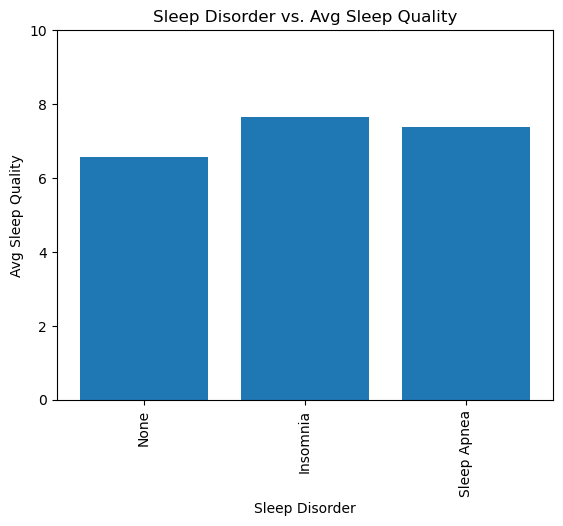

In [14]:
#Looking at quality of sleep vs sleep disorders
plt.bar(sleep_df_clean["Sleep Disorder"].value_counts().index.values ,
        sleep_df_clean.groupby(["Sleep Disorder"])["Quality of Sleep"].mean())
plt.xticks(rotation = 90)
plt.xlabel("Sleep Disorder")
plt.ylabel("Avg Sleep Quality")
plt.title("Sleep Disorder vs. Avg Sleep Quality")
plt.ylim(0,10)
plt.show()

In [15]:
#Removing Samples that are less than 30
value_counts = sleep_df["Daily Steps"].value_counts()
remove = value_counts[value_counts < 30].index
sleep_df_clean = sleep_df[~sleep_df["Daily Steps"].isin(remove)]
#sleep_df_clean.head()

In [16]:
def linear(x,y,title,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-",label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(fontsize=9)
    plt.show()
    print(f"The r value is: {rvalue}")

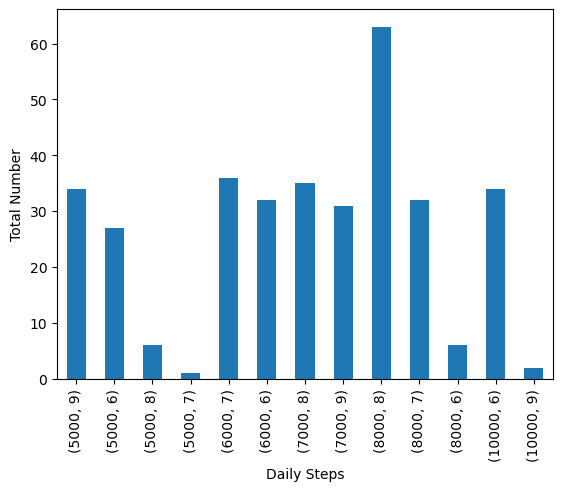

In [17]:
#Total daily steps sample sizes
data_stuff = sleep_df_clean.groupby(["Daily Steps"])["Quality of Sleep"].value_counts()
data_stuff.plot(kind = "bar", rot = 90)
plt.xlabel("Daily Steps")
plt.ylabel("Total Number")
plt.show()

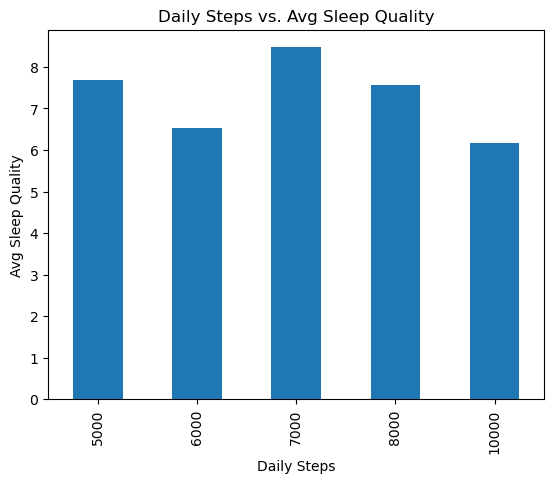

In [18]:
#Looking at daily steps vs quality
data_stuff = sleep_df_clean.groupby(["Daily Steps"])["Quality of Sleep"].mean()
data_stuff.plot(kind="bar", rot=90)
plt.xlabel("Daily Steps")
plt.ylabel("Avg Sleep Quality")
plt.title("Daily Steps vs. Avg Sleep Quality")
plt.show()


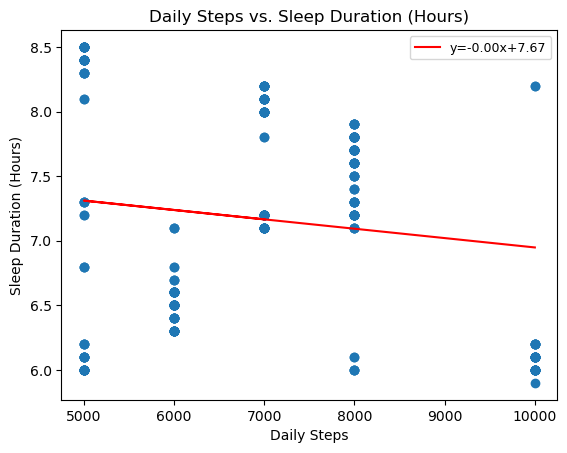

The r value is: -0.13656611338094654


In [19]:
linear(sleep_df_clean["Daily Steps"],sleep_df_clean['Sleep Duration'],
       "Daily Steps vs. Sleep Duration (Hours)", "Daily Steps", "Sleep Duration (Hours)")

In [20]:
#The mean duration and quality based on Daily Steps
daily_steps_df = pd.DataFrame({
    "Mean Daily Steps": sleep_df_clean.groupby(["Daily Steps"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Daily Steps"])["Quality of Sleep"].mean(),
})
daily_steps_df

,Mean Daily Steps,Mean Sleep Quality
Daily Steps,,
5000,7.372059,7.691176
6000,6.525000,6.529412
7000,7.619697,8.469697
8000,7.504950,7.564356
10000,6.191667,6.166667


In [21]:
#Removing Samples that are less than 30
value_counts = sleep_df["Heart Rate"].value_counts()
remove = value_counts[value_counts < 30].index
sleep_df_clean = sleep_df[~sleep_df["Heart Rate"].isin(remove)]
#sleep_df_clean.head()

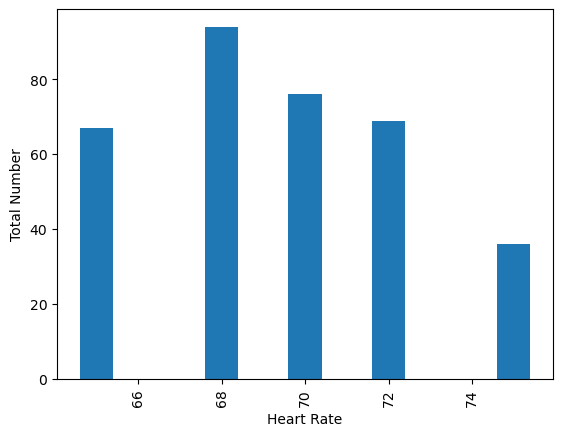

In [22]:
# Looking at heart rate to see sample sizes
plt.bar(sleep_df_clean["Heart Rate"].value_counts().index.values, sleep_df_clean["Heart Rate"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Heart Rate")
plt.ylabel("Total Number")
plt.show()

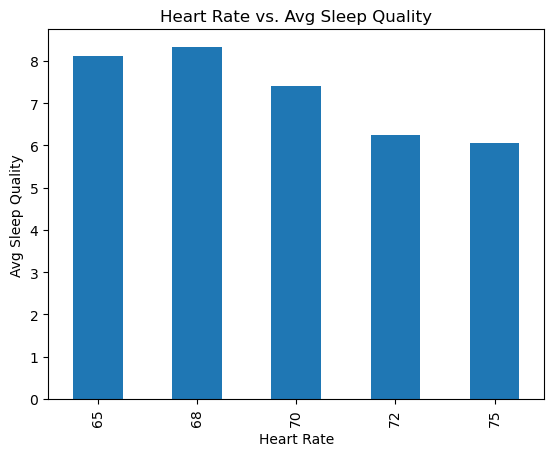

In [23]:
#Looking at heart rate vs quality
data_stuff_heart_rate = sleep_df_clean.groupby(["Heart Rate"])["Quality of Sleep"].mean()
data_stuff_heart_rate.plot(kind="bar", rot=90)
plt.xlabel("Heart Rate")
plt.ylabel("Avg Sleep Quality")
plt.title("Heart Rate vs. Avg Sleep Quality")
plt.show()

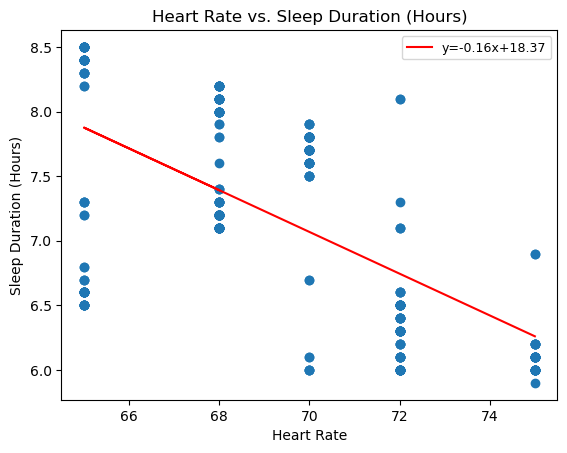

The r value is: -0.6126833869617022


In [24]:
linear(sleep_df_clean["Heart Rate"],sleep_df_clean['Sleep Duration'],
       "Heart Rate vs. Sleep Duration (Hours)", "Heart Rate", "Sleep Duration (Hours)")

In [25]:
#The mean duration and quality based on heart rate
heart_rate_df = pd.DataFrame({
    "Mean Heart Rate": sleep_df_clean.groupby(["Heart Rate"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Heart Rate"])["Quality of Sleep"].mean(),
})
heart_rate_df

,Mean Heart Rate,Mean Sleep Quality
Heart Rate,,
65,7.577612,8.104478
68,7.523404,8.329787
70,7.561842,7.394737
72,6.385507,6.246377
75,6.119444,6.055556


In [26]:
value_counts = sleep_df["Blood Pressure"].value_counts()
remove = value_counts[value_counts < 30].index
sleep_df_clean = sleep_df[~sleep_df["Blood Pressure"].isin(remove)]
sleep_df_clean.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


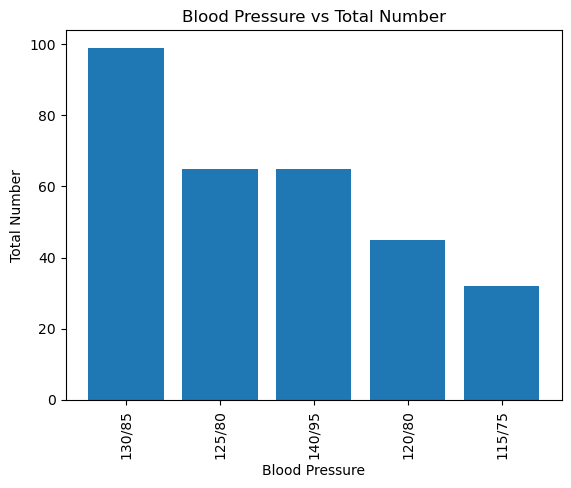

In [27]:
#Blood pressure sample sizes after getting rid of any sample sizes that were less than 30
plt.bar(sleep_df_clean["Blood Pressure"].value_counts().index.values,
         sleep_df_clean["Blood Pressure"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Blood Pressure")
plt.ylabel("Total Number")
plt.title("Blood Pressure vs Total Number")
plt.show()

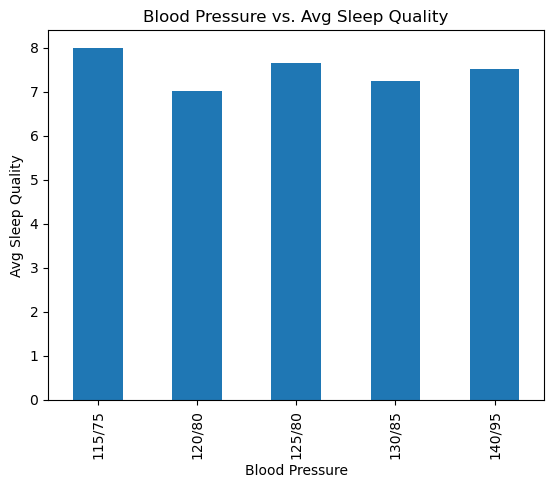

In [28]:
#Looking at Blood Pressure vs quality
data_stuff_blood_pressure = sleep_df_clean.groupby(["Blood Pressure"])["Quality of Sleep"].mean()
data_stuff_blood_pressure.plot(kind="bar", rot=90)
plt.xlabel("Blood Pressure")
plt.ylabel("Avg Sleep Quality")
plt.title("Blood Pressure vs. Avg Sleep Quality")
plt.show()

In [29]:
# #Looking at quality of sleep vs blood pressure
# plt.bar(sleep_df_clean["Blood Pressure"].value_counts().index.values ,
#         sleep_df_clean.groupby(["Blood Pressure"])["Quality of Sleep"].mean())
# plt.xticks(rotation = 90)
# plt.xlabel("Blood Pressure")
# plt.ylabel("Avg Sleep Quality")
# plt.title("Blood Pressure vs. Avg Sleep Quality")
# plt.ylim(0,10)
# plt.show()

In [30]:
#The mean duration and quality based on Blood Pressure
blood_pressure_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Blood Pressure"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Blood Pressure"])["Quality of Sleep"].mean(),
})
blood_pressure_df

,Mean Sleep Duration,Mean Sleep Quality
Blood Pressure,,
115/75,7.162500,8.000000
120/80,7.486667,7.022222
125/80,7.340000,7.661538
130/85,7.084848,7.242424
140/95,7.095385,7.523077


In [31]:
#Removing Samples that are less than 30
value_counts = sleep_df["BMI Category"].value_counts()
remove = value_counts[value_counts < 30].index
sleep_df_clean = sleep_df[~sleep_df["BMI Category"].isin(remove)]
#sleep_df_clean.head()

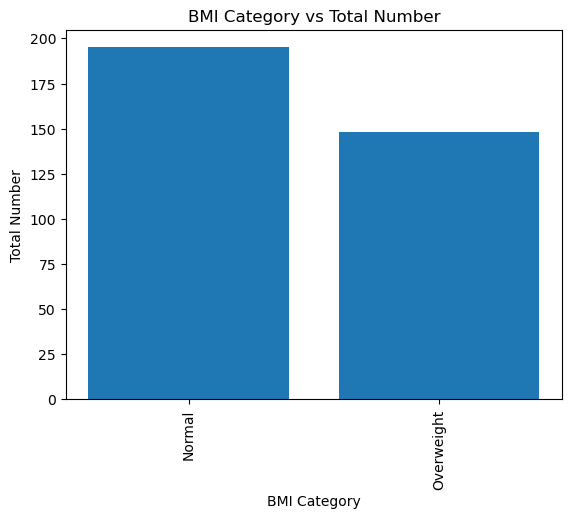

In [32]:
# Looking at sample sizes for BMI category
plt.bar(sleep_df_clean["BMI Category"].value_counts().index.values,
         sleep_df_clean["BMI Category"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("BMI Category")
plt.ylabel("Total Number")
plt.title("BMI Category vs Total Number")
plt.show()

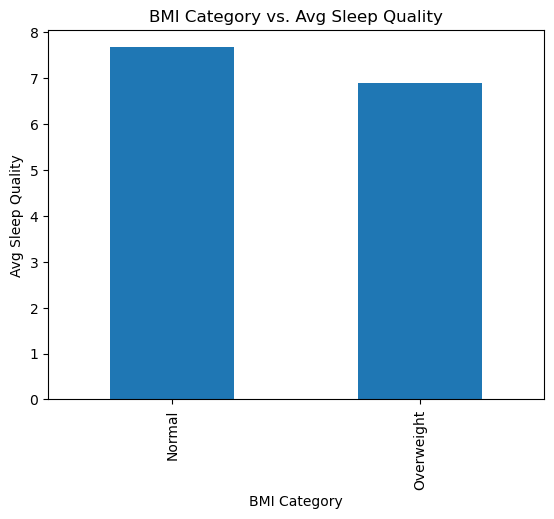

In [33]:
#Looking at heart rate vs quality
data_stuff_BMI = sleep_df_clean.groupby(["BMI Category"])["Quality of Sleep"].mean()
data_stuff_BMI.plot(kind="bar", rot=90)
plt.xlabel("BMI Category")
plt.ylabel("Avg Sleep Quality")
plt.title("BMI Category vs. Avg Sleep Quality")
plt.show()

In [34]:
#The mean duration and quality based on BMI category
bmi_category_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["BMI Category"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["BMI Category"])["Quality of Sleep"].mean(),
})
bmi_category_df

,Mean Sleep Duration,Mean Sleep Quality
BMI Category,,
Normal,7.393846,7.661538
Overweight,6.770270,6.898649


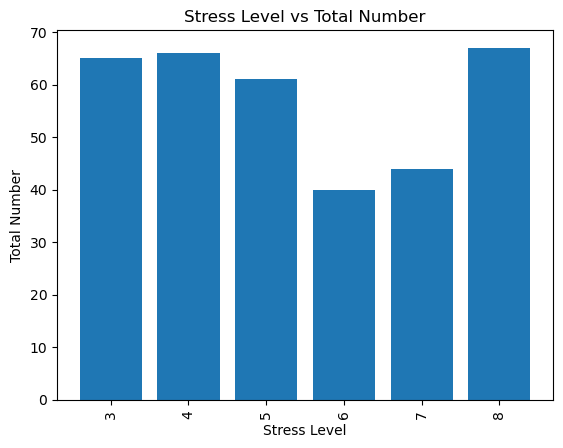

In [35]:
#looking at sample sizes for stress level
plt.bar(sleep_df_clean["Stress Level"].value_counts().index.values,
         sleep_df_clean["Stress Level"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Stress Level")
plt.ylabel("Total Number")
plt.title("Stress Level vs Total Number")
plt.show()

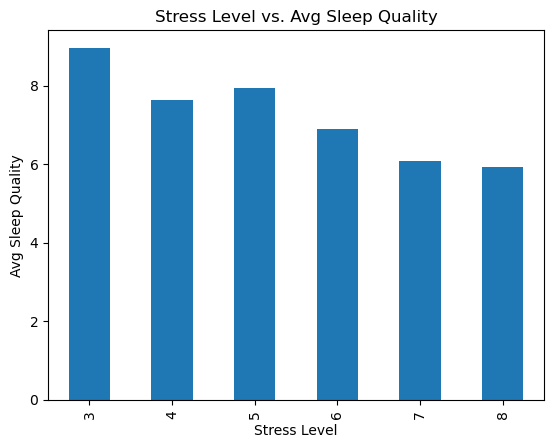

In [36]:
#Looking at heart rate vs quality
data_stuff_stress = sleep_df_clean.groupby(["Stress Level"])["Quality of Sleep"].mean()
data_stuff_stress.plot(kind="bar", rot=90)
plt.xlabel("Stress Level")
plt.ylabel("Avg Sleep Quality")
plt.title("Stress Level vs. Avg Sleep Quality")
plt.show()

In [37]:
#The mean duration and quality based on Daily Steps
stress_level_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df_clean.groupby(["Stress Level"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df_clean.groupby(["Stress Level"])["Quality of Sleep"].mean(),
})
stress_level_df

,Mean Sleep Duration,Mean Sleep Quality
Stress Level,,
3,8.238462,8.969231
4,6.986364,7.651515
5,7.491803,7.950820
6,7.500000,6.900000
7,6.463636,6.090909
8,6.056716,5.940299


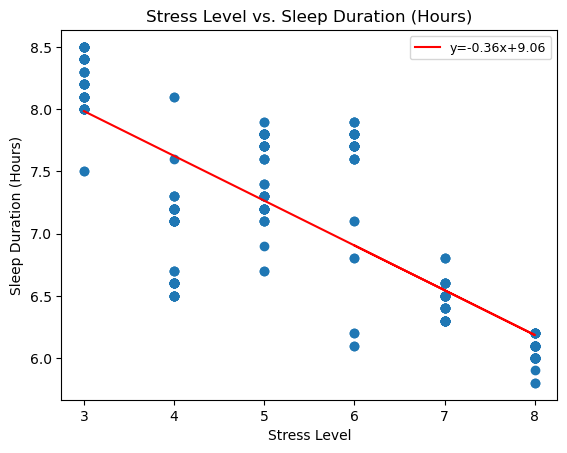

The r value is: -0.8002971708281619


In [38]:
linear(sleep_df_clean["Stress Level"],sleep_df_clean['Sleep Duration'],"Stress Level vs. Sleep Duration (Hours)", "Stress Level", "Sleep Duration (Hours)")